Sample of the generated data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Sample of the scaled data:
   Annual Income_Scaled  Spending Score_Scaled
0             -1.738999              -0.434801
1             -1.738999               1.195704
2             -1.700830              -1.715913
3             -1.700830               1.040418
4             -1.662660              -0.395980

DataFrame with assigned clusters:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15     

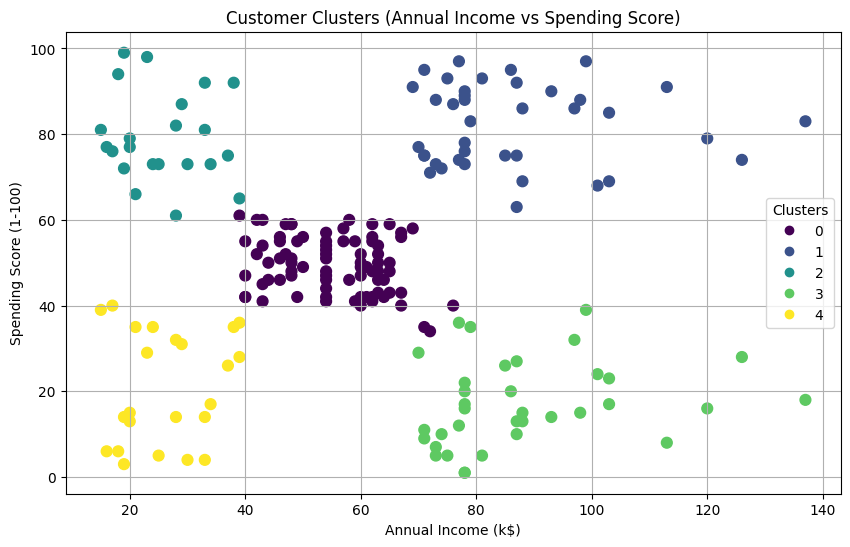

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/content/Mall_Customers.csv')
print("Sample of the generated data:")
print(df.head())

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df_scaled = pd.DataFrame(scaled_features, columns=['Annual Income_Scaled', 'Spending Score_Scaled'])
print("\nSample of the scaled data:")
print(df_scaled.head())

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)
print("\nDataFrame with assigned clusters:")
print(df.head())

cluster_summary = df.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
}).reset_index()
print("\nCluster Analysis Summary:")
print(cluster_summary)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=60)
plt.title('Customer Clusters (Annual Income vs Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.show()
